Image Classification AI Algoritham

Name - SAURAV KUMAR SUBUDHI

MOB -8908128021

MAIL - unrivalledsaurav@gmail.com

**Below Steps are need to simulate for production grade end to end pipeline**

-Problem Definition

-Data Collection and Preprocessing(EDA)

-Data Splitting

-Feature Extraction

-Model Selection

-Model Training

-Hyperparameter Tuning

-Model Evaluation

-Model Optimization

-Deployment and Inference

-Monitoring and Maintenance

# Problem Definition :

The objective of this project is to develop a robust and accurate image classification model that can effectively categorize input images into one of six distinct classes. The model's purpose is to perform object recognition and accurately assign a label to each input image based on its content. The classes encompass a diverse range of objects, making the task challenging and requiring the model to generalize well to different visual patterns.

Data Collection and Preprocessing(EDA)

Below are the steps for collecting and pre-processing data.

-> Data Collection:

    * Data Sources
    * Dataset Selection
    * Data Quantity

->Data Preprocessing:

   * Data Balancing
   * Normalization check
   * Image Resizing
   * Labelling
   * Data Augmentation
   * Train-Validation-Test Split
   

Setup Import TensorFlow and other necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

## **Load and Visualize few Sample Images**

from each class and visualize them to get an initial understanding of your dataset.

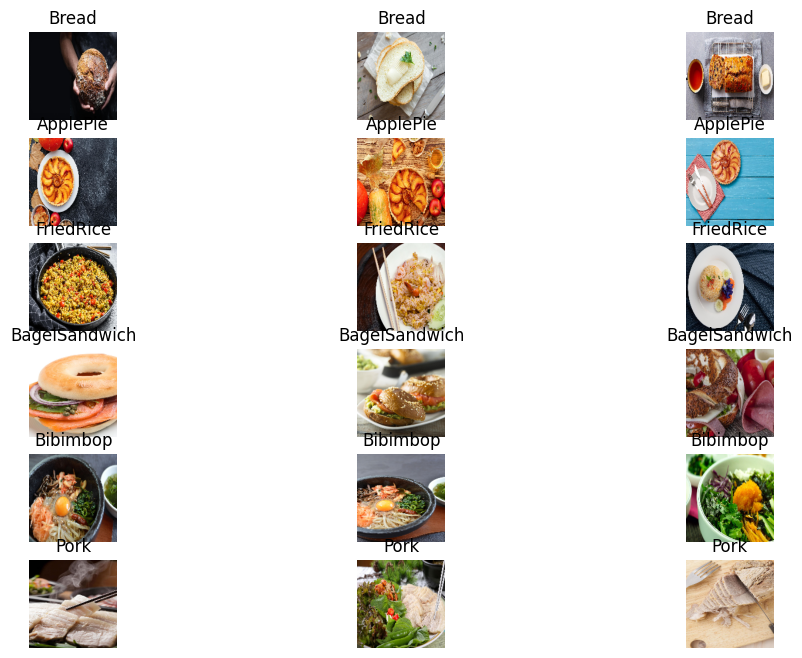

In [2]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Path to the dataset
dataset_path = '/content/drive/MyDrive/FoodImage/'

# Get class names (subfolder names)
class_names = os.listdir(dataset_path)

# Remove '.DS_Store' from class_names if present
class_names = [class_name for class_name in class_names if class_name != '.DS_Store']

# Display 3 sample images from each class
num_samples_per_class = 3
plt.figure(figsize=(12, 8))

for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):  # Check if it's a directory
        image_names = [name for name in os.listdir(class_path) if not name.startswith('.DS_Store')]
        sample_images = image_names[:num_samples_per_class]

        for i, image_name in enumerate(sample_images):
            image_path = os.path.join(class_path, image_name)
            img = load_img(image_path, target_size=(150, 150))

            plt.subplot(len(class_names), num_samples_per_class, class_names.index(class_name) * num_samples_per_class + i + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')

plt.show()


## **EDA(Exploratory data analysis)**

Class Distribution Plot a bar chart to visualize the distribution of images across different classes

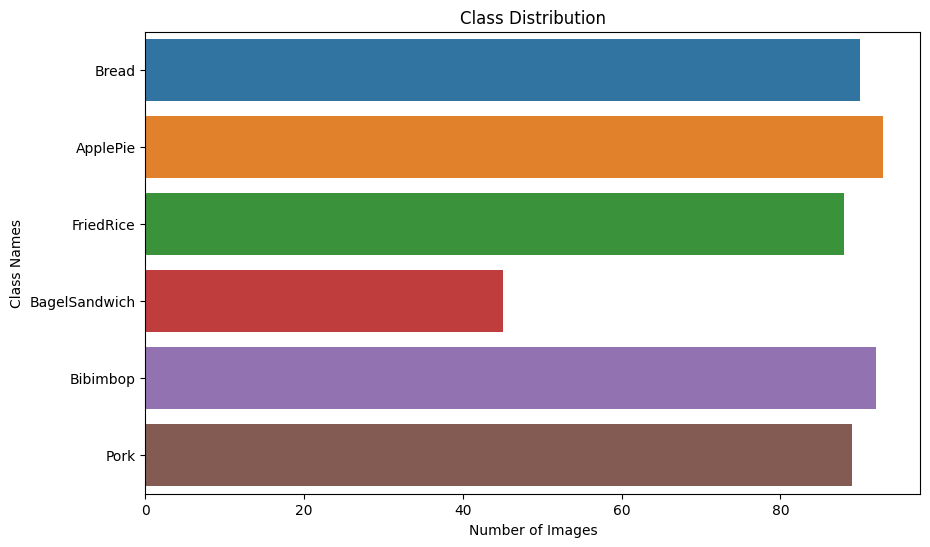

In [3]:
import seaborn as sns

# Count the number of images in each class
class_counts = [len(os.listdir(os.path.join(dataset_path, class_name))) for class_name in class_names]

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts, y=class_names)
plt.xlabel('Number of Images')
plt.ylabel('Class Names')
plt.title('Class Distribution')
plt.show()

Image Size Distribution Explore the distribution of image sizes to ensure consistency

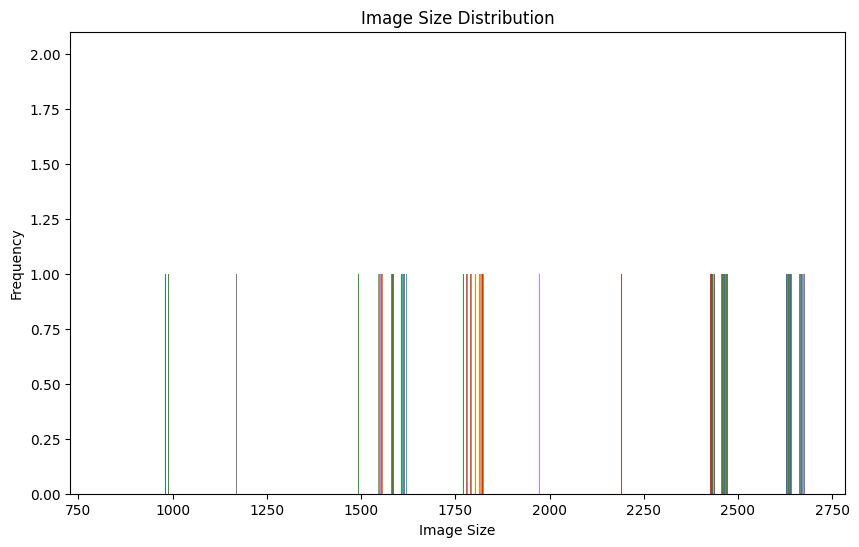

In [4]:
image_sizes = []
# Collect image sizes
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    image_names = os.listdir(class_path)

    for image_name in image_names:
        image_path = os.path.join(class_path, image_name)
        img = load_img(image_path)
        image_sizes.append(img.size)

# Plot image size distribution
plt.figure(figsize=(10, 6))
plt.hist(image_sizes, bins=20)
plt.xlabel('Image Size')
plt.ylabel('Frequency')
plt.title('Image Size Distribution')
plt.show()

Class Imbalance Check for class imbalances by plotting the number of images in each class

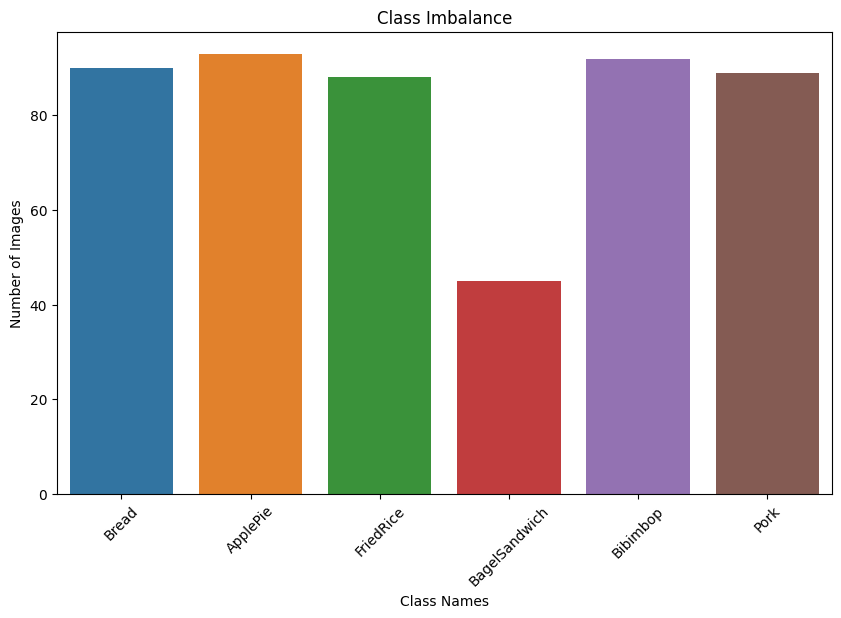

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=class_counts)
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.title('Class Imbalance')
plt.xticks(rotation=45)
plt.show()

conclusion --->>

It is clearly observed that the given data is Not normaly distributed.

We found that the label called BangelSandwich which is have less data points as compair to other .

Below are few techinique which we genarally prefer to balance the dataset.

-->>Data Augmentation

-->>Synthetic Data Generation

-->>Class Weighting

-->>sampling Techniques

-->>Class Weighting

## **Data Augmentation:**(Approch-1)

 Data augmentation can help artificially increase the size of the minority classes by generating new training samples through transformations like rotation, flipping, scaling, and more. This provides the model with more varied examples to learn from.

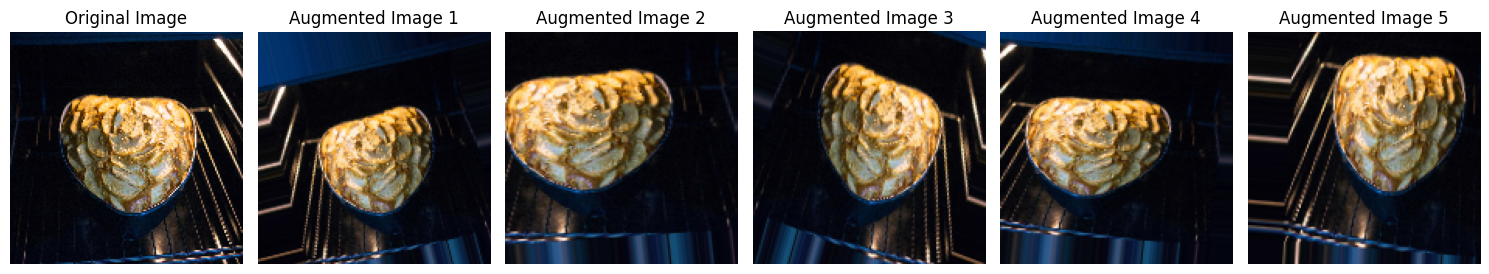

In [6]:
#Hear we are displying some sample augumented output.
import os
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Data augmentation configuration
data_gen_augmented = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Path to the dataset
dataset_path = '/content/drive/MyDrive/FoodImage' ##please pass your path as given.

# Get class names (subfolder names)
class_names = os.listdir(dataset_path)

# Remove '.DS_Store' from class_names if present
class_names = [class_name for class_name in class_names if class_name != '.DS_Store']

# Choose a random class and image for augmentation preview
random_class = random.choice(class_names)
class_path = os.path.join(dataset_path, random_class)
random_image_name = random.choice([name for name in os.listdir(class_path) if not name.startswith('.DS_Store')])
random_image_path = os.path.join(class_path, random_image_name)

# Load the original image
img = load_img(random_image_path, target_size=(150, 150))

# Generate augmented images
augmented_images = data_gen_augmented.flow(img_to_array(img).reshape((1,)+img_to_array(img).shape), batch_size=1)

plt.figure(figsize=(15, 6))

# Display the original image
plt.subplot(1, 6, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Display augmented images
for i in range(5):
    augmented_img = augmented_images.next()[0].astype('uint8')
    plt.subplot(1, 6, i + 2)
    plt.imshow(augmented_img)
    plt.title(f'Augmented Image {i+1}')
    plt.axis('off')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


## **MODEL BUILDING**

In [7]:
#Setup Import TensorFlow and other necessary libraries:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.utils.class_weight import compute_class_weight

# Dataset Splitting

In [8]:
# Define dataset path and class names
dataset_path = '/content/drive/MyDrive/FoodImage/'
class_names = os.listdir(dataset_path)
class_names = [class_name for class_name in class_names if class_name != '.DS_Store']

# Define image parameters
image_height, image_width = 224, 224
batch_size = 32

# Create data generators for training and validation
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)



Found 400 images belonging to 6 classes.
Found 97 images belonging to 6 classes.


In [9]:
test_datagen = ImageDataGenerator(
    rescale=1.0/255
)
test_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset=None  # Since this is for testing, you don't need to specify a subset
)

Found 497 images belonging to 6 classes.


##                                         OR

In [10]:
#############or we can deo it using image splitter ##################

In [11]:
!pip install split-folders

In [12]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/drive/MyDrive/FoodImage", output="output",
    seed=1337, ratio=(.7, .15, .15), group_prefix=None, move=False)

Copying files: 497 files [00:02, 183.11 files/s]


##DATA SPLITING COMPLITED

In [13]:
# Data paths
train_data_dir = '/content/output/train'
validation_data_dir = '/content/output/val'
test_data_dir = '/content/output/test'

# Create data generators for train,test and validation data point.

In [14]:
# Define  parameters
BATCH_SIZE = 16 #update the batch size based upon datset .
IMG_SIZE = (224, 224) #setup the size of the image for pre-processing

## Create the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 345 files belonging to 6 classes.


In [15]:
# Create the validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_data_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 71 files belonging to 6 classes.


In [16]:
# Create the test dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 81 files belonging to 6 classes.


Displaying some sample data

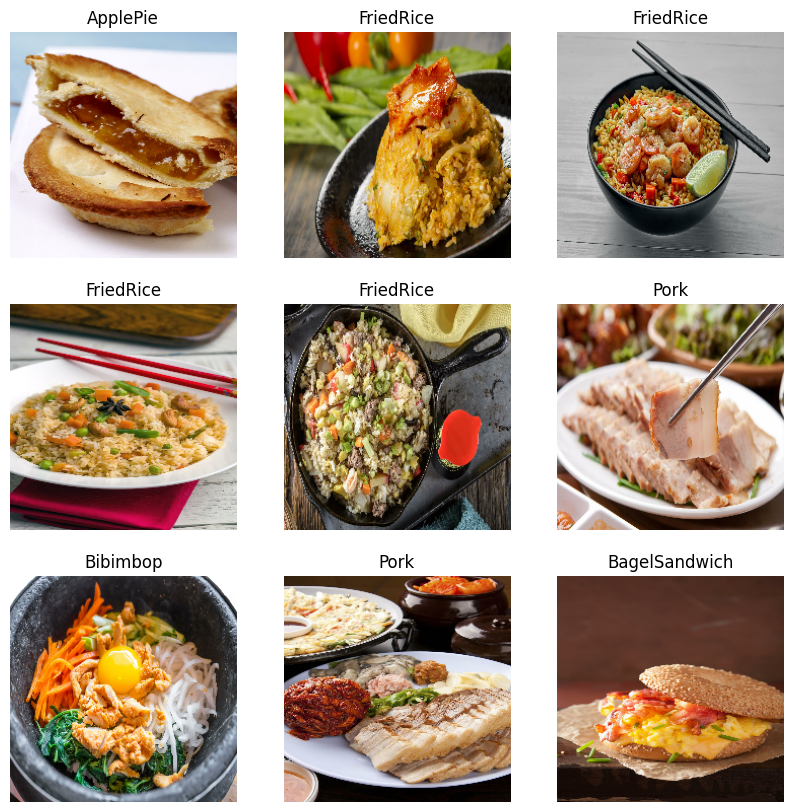

In [17]:
#
class_names = train_dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    num_images = len(images)
    num_display = min(num_images, 9)  # Display at most 9 images
    for i in range(num_display):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [18]:
AUTOTUNE = tf.data.AUTOTUNE #AUTOTUNE is a special value that you are using to argument for certain parameters in TensorFlow's dataset methods.
# Apply prefetching to the datasets
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [19]:
## Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

#Displaying some sample augumented results

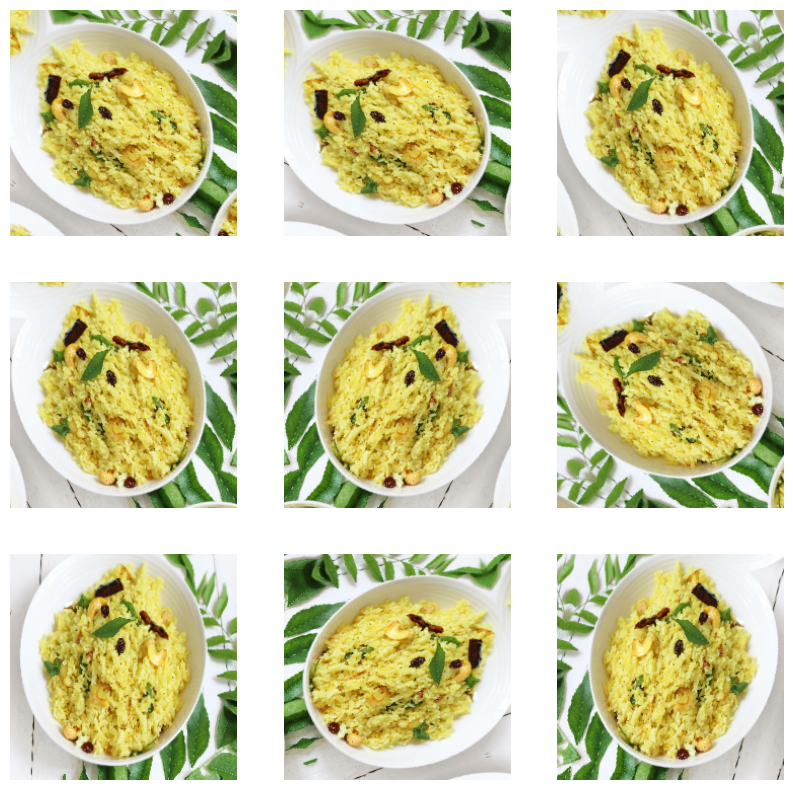

In [20]:

for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [21]:
#important step
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [22]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [23]:
## Get a batch of images and labels from the training dataset
image_batch, label_batch = next(iter(train_dataset))
## Pass the image batch through the base_model to extract features
feature_batch = base_model(image_batch)
#checking shape of the extracted features
print(feature_batch.shape)

(16, 7, 7, 1280)


In [24]:
#Here we are Freeze the layers of the pre-trained model
base_model.trainable = False

In [25]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [26]:
## Apply global average pooling to the extracted features
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
# Print the shape of the pooled features
print(feature_batch_average.shape)

(16, 1280)


In [27]:
## Create a dense layer for predictions
prediction_layer = tf.keras.layers.Dense(6)
# Generate predictions using the dense layer
prediction_batch = prediction_layer(feature_batch_average)
# Print the shape of the predicted values
print(prediction_batch.shape)

(16, 6)


In [28]:
inputs = tf.keras.Input(shape=(224, 224, 3)) #This line defines the input shape of your model. The input shape
x = data_augmentation(inputs) #Here, we're applying the data_augmentation pipeline to the input images.
x = preprocess_input(x) #Here we are preprocesses the augmented images
x = base_model(x, training=False)
x = global_average_layer(x)#Here, we're applying the global average pooling layer to the feature maps extracted from the base model.
x = tf.keras.layers.Dropout(0.2)(x)#we're applying dropout with a rate of 0.2 to the pooled features
outputs = prediction_layer(x)#This line generates the final predictions by passing the output of the dropout layer through the prediction_layer
model = tf.keras.Model(inputs, outputs) #final model

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                             

In [30]:
#By Putting it all together, here's we are compiling our model.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
epochs=10 #Please update according to your need.
#proceed to train
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/10
22/22 [==============================] - 56s 2s/step - loss: 1.6690 - accuracy: 0.3304 - val_loss: 1.1055 - val_accuracy: 0.5775
Epoch 2/10
22/22 [==============================] - 30s 1s/step - loss: 0.8238 - accuracy: 0.6928 - val_loss: 0.6346 - val_accuracy: 0.8310
Epoch 3/10
22/22 [==============================] - 28s 1s/step - loss: 0.5137 - accuracy: 0.8609 - val_loss: 0.4680 - val_accuracy: 0.9014
Epoch 4/10
22/22 [==============================] - 25s 1s/step - loss: 0.3961 - accuracy: 0.8928 - val_loss: 0.4067 - val_accuracy: 0.8873
Epoch 5/10
22/22 [==============================] - 26s 1s/step - loss: 0.3457 - accuracy: 0.9014 - val_loss: 0.3370 - val_accuracy: 0.9155
Epoch 6/10
22/22 [==============================] - 26s 1s/step - loss: 0.2887 - accuracy: 0.9275 - val_loss: 0.3165 - val_accuracy: 0.9296
Epoch 7/10
22/22 [==============================] - 25s 1s/step - loss: 0.2249 - accuracy: 0.9681 - val_loss: 0.2819 - val_accuracy: 0.9437
Epoch 8/10
22/22 [==

From the below code figure with two subplotscshows one for accuracy and one for loss. Each subplot will show how these metrics change over the course of training and validation. This visualization can be very useful for diagnosing issues like overfitting, underfitting, or convergence problems during the training process.

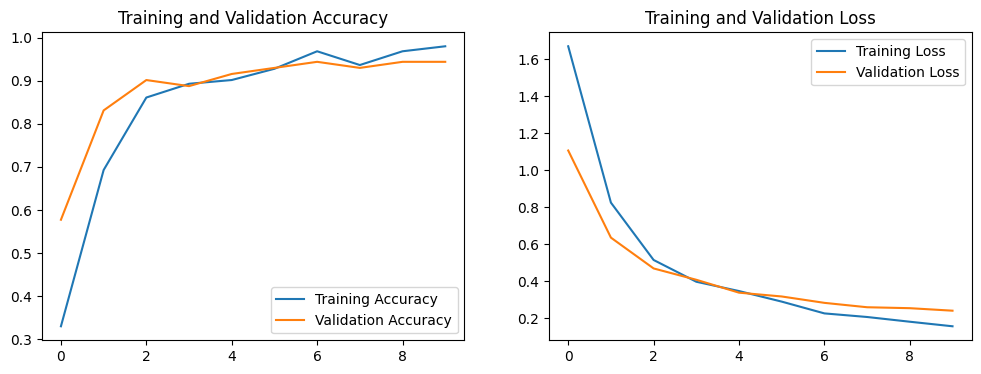

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Single image prediction

In [33]:
#pass your path
apple_pie_path = r"/content/output/test/Bibimbop/B010316XX_02352.jpg"
img = tf.keras.utils.load_img(
    apple_pie_path, target_size=IMG_SIZE
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 1s 1s/step
This image most likely belongs to Bibimbop with a 81.41 percent confidence.


 Here we are observering Accuracy and performance metrics based upon the test Dataset.

Found 81 files belonging to 6 classes.
1/1 [==============================] - 0s 57ms/step


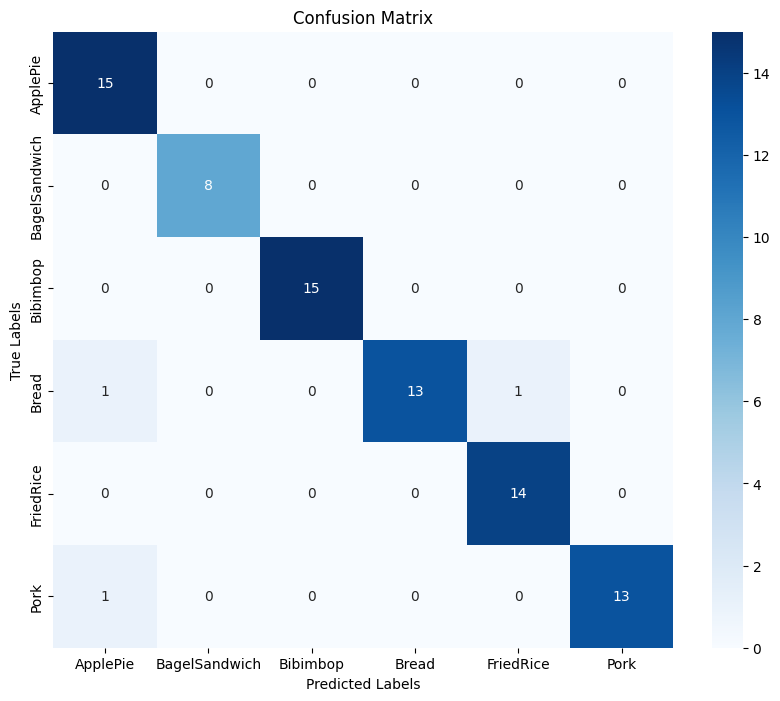

               precision    recall  f1-score   support

     ApplePie       0.88      1.00      0.94        15
BagelSandwich       1.00      1.00      1.00         8
     Bibimbop       1.00      1.00      1.00        15
        Bread       1.00      0.87      0.93        15
    FriedRice       0.93      1.00      0.97        14
         Pork       1.00      0.93      0.96        14

     accuracy                           0.96        81
    macro avg       0.97      0.97      0.97        81
 weighted avg       0.97      0.96      0.96        81



In [34]:
import os
import numpy as np
import tensorflow as tf
from keras.models import load_model
from keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# # Load the Keras model
# model = load_model('path_to_your_model.h5')  # Replace with the actual path

# Define the path to the directory containing test images
test_dir = r'/content/output/test/'

# Load the test dataset using tf.keras.utils.image_dataset_from_directory
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=False,  # Ensure order is maintained for confusion matrix
    batch_size=BATCH_SIZE,  # Use the same batch size as during training
    image_size=IMG_SIZE
)

# Get class names from the test dataset
class_names = test_dataset.class_names

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test dataset and make predictions
for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_labels.extend(labels.numpy())
    predicted_labels.extend(predicted_classes)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)

## **Conclusion ::**

Here as the datsset is inbalance we are considering majorly F1 score to trace the model performance .

As per the request to set up a pile lining to test the images in bunch from folder below are the function to test.

In [35]:
# Save the trained model in HDF5 format
model.save('/content/drive/MyDrive/model.h5')

In [36]:
import pandas as pd
# Define a function to predict a single image using the model
def predict_single_image(model, image_path, class_dirs):
    # Load and preprocess the image
    img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    # Make predictions using the model
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    # Determine the true class of the image
    class_name = None
    for true_class, class_dir in class_dirs.items():
        if image_path.startswith(class_dir):
            class_name = true_class
            break

    # Create a dictionary containing the prediction results
    result = {
        'Image': os.path.basename(image_path),
        'True Class': class_name,
        'Predicted Class': class_name,
        'Predicted Confidence (%)': 100 * np.max(score)
    }
    return result

In [37]:
# Define a function to predict and save results for all images in a directory
def predict_and_save_results(model, data_directory,csv_saving_dir):
    # Create a dictionary of class directories
    class_dirs = {}
    for class_name in os.listdir(data_directory):
        class_dir = os.path.join(data_directory, class_name)
        if os.path.isdir(class_dir):
            class_dirs[class_name] = class_dir

    # Initialize a list to store prediction results
    results = []

    # Iterate through each class directory and image
    for class_name, class_dir in class_dirs.items():
        for image_filename in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_filename)
            # Predict the image and append results to the list
            result = predict_single_image(model, image_path, class_dirs)
            results.append(result)

    # Create a DataFrame from the results and save to a CSV file
    results_df = pd.DataFrame(results)
    results_df.to_csv(str(csv_saving_dir)+'predictions.csv', index=False)#
    print("Predictions saved to predictions.csv")

In [38]:
# Load your trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/model.h5')

# Provide the directory where your test images are located
data_directory = r'/content/drive/MyDrive/FoodImage/'

#Provide the directory where your want to store the csv file which contains results of all images avaiable inside test dir.

csv_saving_dir = "./"
# Call the function to predict and save results
predict_and_save_results(model, data_directory,csv_saving_dir)

1/1 [==============================] - 0s 68ms/step
Predictions saved to predictions.csv


--------------------------------------END--------------------------------